In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ds100_utils
import sqlalchemy
from pathlib import Path

In [30]:
Bees = pd.read_csv("Data/Bee Colony Survey Data By State.csv")

In [31]:
Bees

,Year,Period,Week Ending,State,State ANSI,Watershed,Data Item,Value,CV (%)
0,2017,JAN THRU MAR,NaN,ALABAMA,1,NaN,ADDED & REPLACED,570,NaN
1,2017,JAN THRU MAR,NaN,ARIZONA,4,NaN,ADDED & REPLACED,"2,900",NaN
2,2017,JAN THRU MAR,NaN,ARKANSAS,5,NaN,ADDED & REPLACED,430,NaN
3,2017,JAN THRU MAR,NaN,CALIFORNIA,6,NaN,ADDED & REPLACED,"215,000",NaN
4,2017,JAN THRU MAR,NaN,COLORADO,8,NaN,ADDED & REPLACED,100,NaN
...,...,...,...,...,...,...,...,...,...
3391,1987,MARKETING YEAR,NaN,VIRGINIA,51,NaN,INVENTORY,"25,000",NaN
3392,1987,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,"75,000",NaN
3393,1987,MARKETING YEAR,NaN,WEST VIRGINIA,54,NaN,INVENTORY,"21,000",NaN
3394,1987,MARKETING YEAR,NaN,WISCONSIN,55,NaN,INVENTORY,"92,000",NaN


In [32]:
list_values = Bees["Data Item"].value_counts()
list_values

INVENTORY                         1778
ADDED & REPLACED                   450
INVENTORY, MAX                     450
LOSS, DEADOUT                      450
LOSS, COLONY COLLAPSE DISORDER     268
Name: Data Item, dtype: int64

In [43]:
SortedBees = Bees.sort_values(by=["State"], ascending = True)
SortedBees

,Year,Period,Week Ending,State,State ANSI,Watershed,Data Item,Value,CV (%)
0,2017,JAN THRU MAR,NaN,ALABAMA,1,NaN,ADDED & REPLACED,570,NaN
2307,2011,MARKETING YEAR,NaN,ALABAMA,1,NaN,INVENTORY,"9,000",NaN
405,2015,OCT THRU DEC,NaN,ALABAMA,1,NaN,ADDED & REPLACED,80,NaN
2676,2002,MARKETING YEAR,NaN,ALABAMA,1,NaN,INVENTORY,"12,000",NaN
1528,2015,JUL THRU SEP,NaN,ALABAMA,1,NaN,"LOSS, DEADOUT","1,400",NaN
...,...,...,...,...,...,...,...,...,...
1617,2015,OCT THRU DEC,NaN,WYOMING,56,NaN,"LOSS, DEADOUT","1,300",NaN
3155,1992,MARKETING YEAR,NaN,WYOMING,56,NaN,INVENTORY,"41,000",NaN
584,2016,JAN THRU MAR,NaN,WYOMING,56,NaN,"INVENTORY, MAX","6,500",NaN
1527,2015,APR THRU JUN,NaN,WYOMING,56,NaN,"LOSS, DEADOUT","3,200",NaN


In [33]:
state_entries_list = Bees["State"].value_counts()
state_entries_list

ALABAMA           77
SOUTH DAKOTA      77
MONTANA           77
ARIZONA           77
NEW YORK          77
NORTH CAROLINA    77
NORTH DAKOTA      77
OHIO              77
OREGON            77
PENNSYLVANIA      77
TENNESSEE         77
MISSISSIPPI       77
TEXAS             77
UTAH              77
VERMONT           77
VIRGINIA          77
WASHINGTON        77
WEST VIRGINIA     77
WISCONSIN         77
WYOMING           77
MISSOURI          77
NEBRASKA          77
MINNESOTA         77
IOWA              77
ARKANSAS          77
CALIFORNIA        77
COLORADO          77
FLORIDA           77
GEORGIA           77
HAWAII            77
IDAHO             77
ILLINOIS          77
MICHIGAN          77
INDIANA           77
KANSAS            77
KENTUCKY          77
LOUISIANA         77
MAINE             77
NEW JERSEY        76
NEW MEXICO        72
SOUTH CAROLINA    63
OKLAHOMA          63
MARYLAND          63
MASSACHUSETTS     50
CONNECTICUT       49
NEVADA            22
DELAWARE           4
NEW HAMPSHIRE

In [35]:
year_list = Bees["Year"].value_counts()
year_list

2016    940
2015    760
2017    488
1988     49
1989     49
1990     49
1987     49
2002     44
1991     44
1992     44
1993     44
1994     44
1995     44
2003     44
1996     44
2001     44
1999     43
1997     43
1998     43
2000     43
2004     41
2005     41
2006     41
2007     41
2008     41
2009     40
2011     40
2012     40
2014     40
2010     40
2013     39
Name: Year, dtype: int64

In [60]:
Washington_Bees = SortedBees.iloc[3088:3165, :]

In [61]:
Washington_Bees

,Year,Period,Week Ending,State,State ANSI,Watershed,Data Item,Value,CV (%)
491,2017,JAN THRU MAR,NaN,WASHINGTON,53,NaN,"INVENTORY, MAX","104,000",NaN
1829,2016,FIRST OF JAN,NaN,WASHINGTON,53,NaN,INVENTORY,"77,000",NaN
761,2015,JAN THRU MAR,NaN,WASHINGTON,53,NaN,"INVENTORY, MAX","105,000",NaN
1784,2016,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,"84,000",NaN
1164,2016,OCT THRU DEC,NaN,WASHINGTON,53,NaN,"LOSS, COLONY COLLAPSE DISORDER","3,600",NaN
...,...,...,...,...,...,...,...,...,...
896,2015,OCT THRU DEC,NaN,WASHINGTON,53,NaN,"INVENTORY, MAX","89,000",NaN
3392,1987,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,"75,000",NaN
401,2015,JUL THRU SEP,NaN,WASHINGTON,53,NaN,ADDED & REPLACED,"1,800",NaN
2932,1997,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,"60,000",NaN


In [84]:
Washington_Bees = Washington_Bees.apply(lambda x : x.replace(',', ''))
#Washington_Bees["Value"] = Washington_Bees["Value"].astype(str)
Washington_Bees

,Year,Period,Week Ending,State,State ANSI,Watershed,Data Item,Value,CV (%)
491,2017,JAN THRU MAR,NaN,WASHINGTON,53,NaN,"INVENTORY, MAX",104000,NaN
1829,2016,FIRST OF JAN,NaN,WASHINGTON,53,NaN,INVENTORY,77000,NaN
761,2015,JAN THRU MAR,NaN,WASHINGTON,53,NaN,"INVENTORY, MAX",105000,NaN
1784,2016,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,84000,NaN
1164,2016,OCT THRU DEC,NaN,WASHINGTON,53,NaN,"LOSS, COLONY COLLAPSE DISORDER",3600,NaN
...,...,...,...,...,...,...,...,...,...
896,2015,OCT THRU DEC,NaN,WASHINGTON,53,NaN,"INVENTORY, MAX",89000,NaN
3392,1987,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,75000,NaN
401,2015,JUL THRU SEP,NaN,WASHINGTON,53,NaN,ADDED & REPLACED,1800,NaN
2932,1997,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,60000,NaN


In [88]:
Washington_Bees["Value"] = Washington_Bees["Value"].astype(int)
Washington_Bees["Year"] = Washington_Bees["Year"].astype(int)

In [91]:
x_bar = np.mean ( Washington_Bees["Year"] )
y_bar = np.mean( Washington_Bees["Value"])
std_x = np.std(  Washington_Bees["Year"] )
std_y = np.std ( Washington_Bees["Value"] )
r = np.corrcoef( Washington_Bees["Year"], Washington_Bees["Value"] )[0][1]

b_hat = r *(std_y /  std_x)
a_hat = y_bar - b_hat*(x_bar)

regression = a_hat + b_hat*Washington_Bees["Year"]

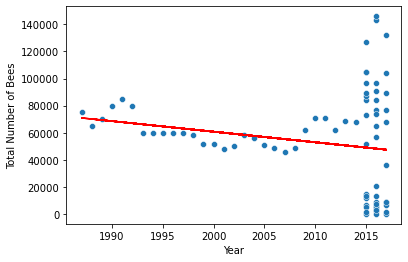

In [94]:
sns.scatterplot(x='Year', y='Value', data=Washington_Bees)
plt.plot( Washington_Bees["Year"], regression, color = 'r' )
plt.xlabel('Year')
plt.ylabel('Total Number of Bees');